In [122]:
from __future__ import division
import sys, os, glob
import numpy as np
from scipy import stats
from astropy import units as u
from astropy import constants as const
from astropy.cosmology import LambdaCDM
import matplotlib as mpl
from matplotlib import pyplot as plt, rc
import h5py
import pandas as pd
import pickle
sys.path.insert(0, '/cosma5/data/dp004/dc-beck3/lib/')
import read_hdf5
sys.path.insert(0, '/cosma5/data/dp004/dc-beck3/StrongLensing/LensingPostProc/lib/')
import matching
import lens
import lpp_pyfuncs

In [123]:
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.size'] = 6      # major tick size in points
plt.rcParams['xtick.minor.size'] = 3      # minor tick size in points
plt.rcParams['xtick.major.width'] = 3    # major tick width in points
plt.rcParams['xtick.minor.width'] = 3    # minor tick width in points
plt.rcParams['ytick.major.size'] = 6      # major tick size in points
plt.rcParams['ytick.minor.size'] = 3      # minor tick size in points
plt.rcParams['ytick.major.width'] = 3    # major tick width in points
plt.rcParams['ytick.minor.width'] = 3    # minor tick width in points
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.figsize'] = [10, 8]

In [127]:
# Load Files
simname = ['F5', 'F6', 'GR']

snapnum = 39
simdir = '/cosma6/data/dp004/dc-arno1/SZ_project/full_physics/'\
         'L62_N512_%s_kpc/'
lmdir = '/cosma5/data/dp004/dc-beck3/StrongLensing/LensingMap/'\
        'full_physics/Subfind/L62_N512_%s_kpc/Box/LM_%s_zl020zs409.pickle'
hfdir = '/cosma6/data/dp004/dc-arno1/SZ_project/full_physics/'\
        'L62_N512_%s_kpc/'
lppdir = '/cosma5/data/dp004/dc-beck3/StrongLensing/LensingPostProc/'\
         'full_physics/Subfind/Box/LPPBox_%s_lens_zl020zs409.h5'

iPTF16geu = {'Rein' : 1.05,                              #[kpc]
             'Mein' : np.array([1.7*1e10, 0.06, 0.06]),  #[Msol]
             'Vrms' : np.array([163, 41, 27]),           #[km/s]
             'e' : np.array([0.15, 0.07, 0.07]),         # Ellipticity
             'mu' : 52}

s = read_hdf5.snapshot(snapnum, simdir%simname[2])
cosmo = LambdaCDM(H0=s.header.hubble*100,
                  Om0=s.header.omega_m,
                  Ode0=s.header.omega_l)
iPTF16geu['Rein'] = (iPTF16geu['Rein']/ \
                     cosmo.angular_diameter_distance(s.header.redshift).to_value('kpc')*u.rad).to_value('arcsec')
print(iPTF16geu['Rein'])

Headername: /cosma6/data/dp004/dc-arno1/SZ_project/full_physics/L62_N512_GR_kpc/snapdir_039/snap_039.0.hdf5
Sanpname: /cosma6/data/dp004/dc-arno1/SZ_project/full_physics/L62_N512_GR_kpc/snapdir_039/snap_039
0.307768599809


## Subhalo Properties

In [128]:
for ff in range(len(simname)):
    lppfile = lppdir % simname[ff]
    print(lppfile)
    
    # Subhalo Data
    if simname[ff] == 'F5':
        lenses_f5 = pd.read_hdf(lppfile)  #Problems with python3.6
    elif simname[ff] == 'F6':
        lenses_f6 = pd.read_hdf(lppfile)
    elif simname[ff] == 'GR':
        lenses_gr = pd.read_hdf(lppfile)

print(lenses_f5.columns.values)

/cosma5/data/dp004/dc-beck3/StrongLensing/LensingPostProc/full_physics/Subfind/Box/LPPBox_F5_lens_zl020zs409.h5
/cosma5/data/dp004/dc-beck3/StrongLensing/LensingPostProc/full_physics/Subfind/Box/LPPBox_F6_lens_zl020zs409.h5
/cosma5/data/dp004/dc-beck3/StrongLensing/LensingPostProc/full_physics/Subfind/Box/LPPBox_GR_lens_zl020zs409.h5
['Mass' 'Npart' 'Rstellarhalfmass' 'Vrms' 'offset' 'Pos' 'Vel' 'ZL' 'Rein'
 'ZS' 'Nimg' 'FOV' 'theta' 'delta_t' 'mu' 'Mlens' 'Ellipticity'
 'Prolateness' 'VelProfRad' 'VelProfMeas' 'VrmsProfRad' 'VrmsProfMeas'
 'DensProfRad' 'DensProfMeas' 'SMProfRad' 'SMProfMeas' 'SCVProfRad'
 'SCVProfMeas']


# Mein vs. Rein

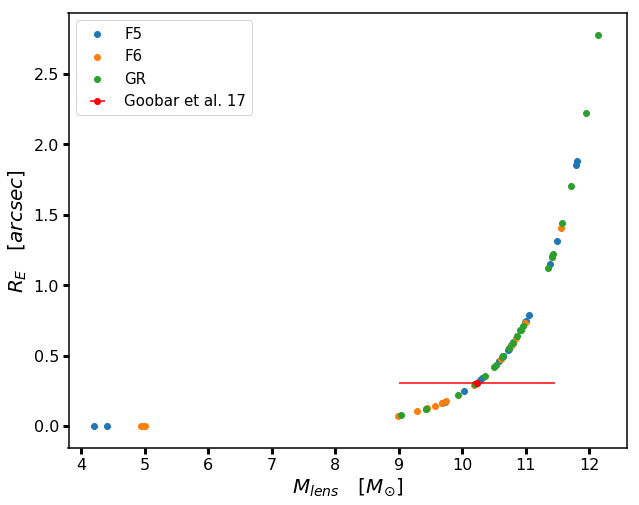

In [133]:
plt.scatter(np.log10(lenses_f5['Mlens'].values),
            (lenses_f5['Rein'].values),
            label='F5')
plt.scatter(np.log10(lenses_f6['Mlens'].values),
            (lenses_f6['Rein'].values),
            label='F6')
plt.scatter(np.log10(lenses_gr['Mlens'].values),
            (lenses_gr['Rein'].values),
            label='GR')
plt.errorbar(np.log10(iPTF16geu['Mein'][0]),
             iPTF16geu['Rein'],
             xerr=[np.log10(iPTF16geu['Mein'][1:])],
             color='red', fmt='o',
             label='Goobar et al. 17')

#plt.xlim(8.5, 12.5)
plt.xlabel(r'$M_{lens} \quad [M_{\odot}]$')
plt.ylabel(r'$R_{E} \quad [arcsec]$')
plt.legend(loc=2)
plt.savefig('iPTF16geu_Mlens_Rein.png',
            bbox_inches='tight')

# Mein vs. Vrms

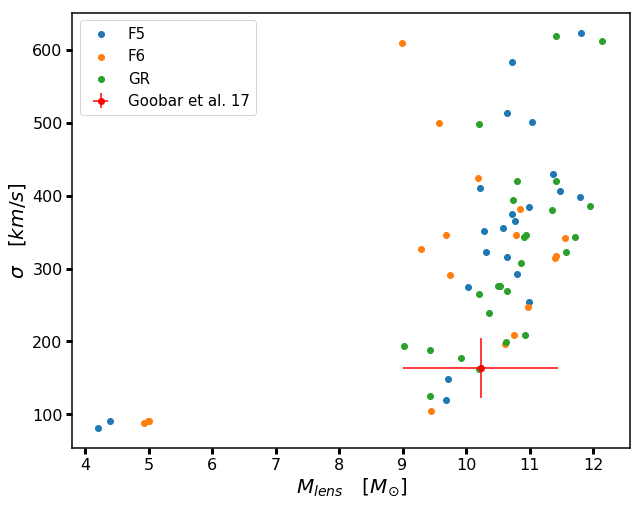

In [130]:
plt.scatter(np.log10(lenses_f5['Mlens'].values),
            (lenses_f5['Vrms'].values),
            label='F5')
plt.scatter(np.log10(lenses_f6['Mlens'].values),
            (lenses_f6['Vrms'].values),
            label='F6')
plt.scatter(np.log10(lenses_gr['Mlens'].values),
            (lenses_gr['Vrms'].values),
            label='GR')

plt.errorbar(np.log10(iPTF16geu['Mein'][0]),
             iPTF16geu['Vrms'][0],
             xerr=[np.log10(iPTF16geu['Mein'][1:])],
             yerr=[iPTF16geu['Vrms'][1:]],
             color='red', fmt='o',
             label='Goobar et al. 17')

#plt.xlim(8.5, 12.5)
plt.xlabel(r'$M_{lens} \quad [M_{\odot}]$')
plt.ylabel(r'$\sigma \quad [km/s]$')
plt.legend(loc=2)
plt.savefig('iPTF16geu_Mlens_vrms.png',
            bbox_inches='tight')

# Vrms vs. Rein

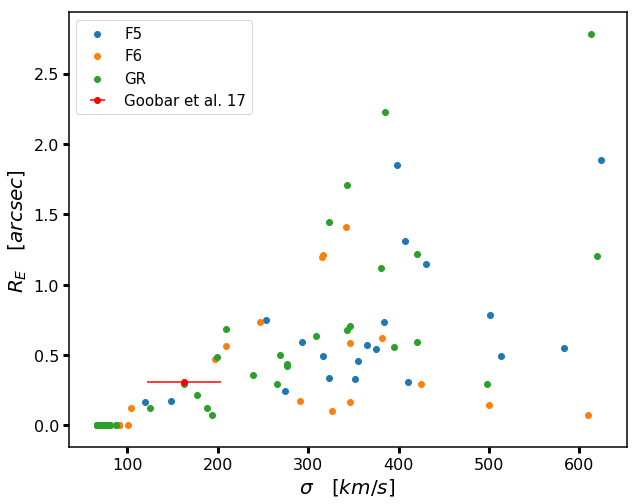

In [134]:
plt.scatter((lenses_f5['Vrms'].values),
            (lenses_f5['Rein'].values),
            label='F5')
plt.scatter((lenses_f6['Vrms'].values),
            (lenses_f6['Rein'].values),
            label='F6')
plt.scatter((lenses_gr['Vrms'].values),
            (lenses_gr['Rein'].values),
            label='GR')

plt.errorbar(iPTF16geu['Vrms'][0],
             iPTF16geu['Rein'],
             xerr=[iPTF16geu['Vrms'][1:]],
             color='red', fmt='o',
             label='Goobar et al. 17')

#plt.xlim(8.5, 12.5)
plt.xlabel(r'$\sigma \quad [km/s]$')
plt.ylabel(r'$R_{E} \quad [arcsec]$')
plt.legend(loc=2)
plt.savefig('iPTF16geu_vrms_Rein.png',
            bbox_inches='tight')

# Magnification

29
[-123.44478  -78.70029  -91.06293]


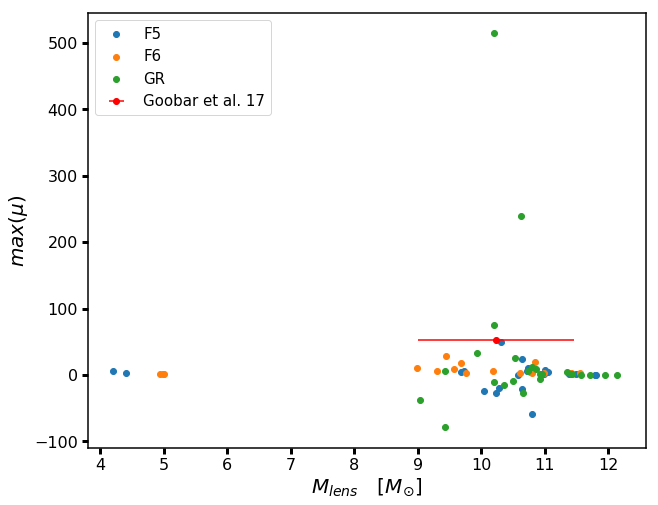

In [132]:
mu = [np.max(img) for img in lenses_f5['mu'].values]
plt.scatter(np.log10(lenses_f5['Mlens'].values),
            mu, label='F5')
mu = [np.max(img) for img in lenses_f6['mu'].values]
plt.scatter(np.log10(lenses_f6['Mlens'].values),
            mu, label='F6')
mu = [np.max(img) for img in lenses_gr['mu'].values]
print(np.argmin(mu))
print(lenses_gr['mu'].values[29])
plt.scatter(np.log10(lenses_gr['Mlens'].values),
            mu, label='GR')

plt.errorbar(np.log10(iPTF16geu['Mein'][0]),
             iPTF16geu['mu'],
             xerr=[np.log10(iPTF16geu['Mein'][1:])],
             color='red', fmt='o',
             label='Goobar et al. 17')

#plt.xlim(8.5, 12.5)
#plt.ylim(0, 55)
#plt.yscale('log')
plt.xlabel(r'$M_{lens} \quad [M_{\odot}]$')
plt.ylabel(r'$max(\mu)$')
plt.legend(loc=2)
plt.savefig('iPTF16geu_Mlens_mu.png',
            bbox_inches='tight')

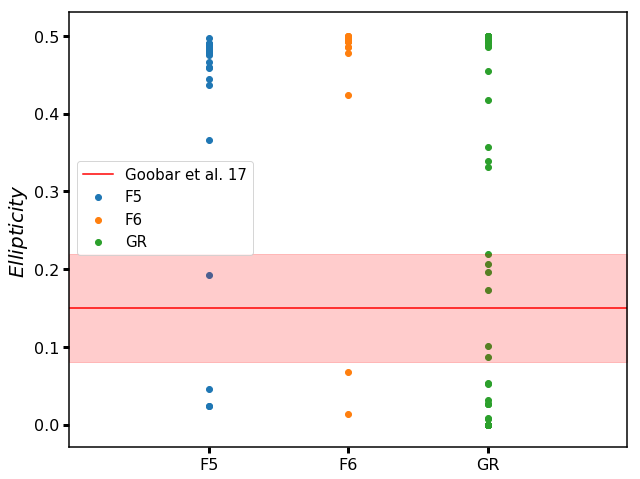

In [92]:
plt.scatter(np.ones(len(lenses_f5['Ellipticity'].values))*1,
            lenses_f5['Ellipticity'].values,
            label='F5')
plt.scatter(np.ones(len(lenses_f6['Ellipticity'].values))*2,
            lenses_f6['Ellipticity'].values,
            label='F6')
plt.scatter(np.ones(len(lenses_gr['Ellipticity'].values))*3,
            lenses_gr['Ellipticity'].values,
            label='GR')
plt.plot([0.0, 4.0], [iPTF16geu['e'][0], iPTF16geu['e'][0]],
         color='red', label='Goobar et al. 17')
plt.fill_between([0.0, 4.0],
                 [iPTF16geu['e'][0]+iPTF16geu['e'][1],
                  iPTF16geu['e'][0]+iPTF16geu['e'][1]],
                 [iPTF16geu['e'][0]-iPTF16geu['e'][1],
                  iPTF16geu['e'][0]-iPTF16geu['e'][1]],
                 color='red', alpha=0.2)

tickloc = np.array([1., 2., 3.])
ticklab = np.array(['F5', 'F6', 'GR'])
plt.xticks(tickloc, ticklab)

plt.rcParams['legend.fontsize'] = 15
plt.xlim(0, 4)
plt.ylabel(r'$Ellipticity$')
plt.legend(bbox_to_anchor=(0.0,0.55), loc=6)
plt.savefig('iPTF16geu_ellipticity.png',
            bbox_inches='tight')

In [120]:
print(len(lenses_f5['Nimg'][lenses_f5['Nimg'] == 5].index.values))
print(len(lenses_f6['Nimg'][lenses_f6['Nimg'] == 5].index.values))
print(len(lenses_gr['Nimg'][lenses_gr['Nimg'] == 5].index.values))

10
8
13
